In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r_set as sim_set
from TO_sim.Utility import Create_Folder
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf as func
from TO_sim.gen_Distribution import Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm

In [2]:
N =500
seeds = np.arange(0,50,1)
theta_s, omega_s = {},{}
for seed in seeds:
    theta_s[seed],omega,Kc = Normal(N,0,1,seed=seed)
    omega_s[seed] = np.sort(omega)
# theta0 = np.ones_like(theta)
dt = 0.1

m = 20
t_end=1500
t = np.arange(0,t_end+dt/2,dt)

t_=15000
t_set = np.arange(0,t_+dt/2,dt)
K = 2.5
dK =0.5



In [3]:
dK = 0.5
Ks = np.arange(1,15,dK)

In [112]:
data = []
K_ = []
# K = 2.0
# for seed in seeds:
#     theta,omega,Kc = Normal(N,0,1,seed=seed)
#     data.append((K,theta,omega,omega))
#     K_.append(K)
K = 2.5
for seed in seeds:
    theta,omega,Kc = Normal(N,0,1,seed=seed)
    data.append((K,theta,omega,omega))
    K_.append(K)


In [113]:
dK = 0.5
t_end = 1500
df_s = pd.read_csv(f'review/m={m},t={t_end},dK={dK}.csv',index_col=[0,1])

FileNotFoundError: [Errno 2] No such file or directory: 'review/m=8,t=1500,dK=0.5.csv'

In [99]:
df_s.loc[0,1].rs

'[0.03193045 0.03193045 0.03305932 ... 0.00763052 0.01091974 0.01529326]'

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [53]:
for i,(seed,(df_s.xs(seed).rs[K])) in enumerate(zip(seeds,parmap.map(sim_set,data,N=N,m=m,t_array=t_set,pm_processes=15,pm_pbar=True))):pass

  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\kim9y\AppData\Local\Temp\ipykernel_13028\4196843944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for i,(seed,(df_s.xs(seed).rs[K])) in enumerate(zip(seeds,parmap.map(sim_set,data,N=N,m=m,t_array=t_set,pm_processes=15,pm_pbar=True))):pass


In [58]:
mean_r = lambda x: np.mean(x[-500:])
std_r = lambda x: np.std(x[-500:])
for seed in seeds:
    df_s.loc[seed,K].r_mean = mean_r(df_s.loc[seed,K].rs)
    df_s.loc[seed,K].r_std = std_r(df_s.loc[seed,K].rs)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_13028\2062874293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.loc[seed,K].r_mean = mean_r(df_s.loc[seed,K].rs)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_13028\2062874293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.loc[seed,K].r_std = std_r(df_s.loc[seed,K].rs)


In [132]:
df_set = {}

mean_r = lambda x: np.mean(x[-500:])
std_r = lambda x: np.std(x[-500:])

In [115]:
df = pd.DataFrame({'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
# rdf = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)
seed =10
theta,omega,Kc = Normal(N,0,1,seed=seed)
for i,(K,(df.rs[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta,p_dtheta= omega,p_omega=omega,pm_processes=15,pm_pbar=True))):pass

df['r_mean'] = df.rs.apply(mean_r)
df['r_std'] = df.rs.apply(std_r)

  0%|          | 0/28 [00:00<?, ?it/s]

In [133]:
for seed in tqdm(seeds):
    df = pd.DataFrame({'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
# rdf = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)
    theta,omega = theta_s[seed],omega_s[seed]
    for i,(K,(df.rs[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta,p_dtheta= omega,p_omega=omega,pm_processes=15,pm_pbar=False))):pass
    df['r_mean'] = df.rs.apply(mean_r)
    df['r_std'] = df.rs.apply(std_r)    
    df_set[seed] = df
# for i,(K,(rdf.theta[K],rdf.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta0,p_dtheta= np.zeros_like(omega),p_omega=omega,pm_processes=15,pm_pbar=True))):pass


  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
df_set.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [134]:
for seed in seeds:
    df_set[seed] = df_s.loc[seed]

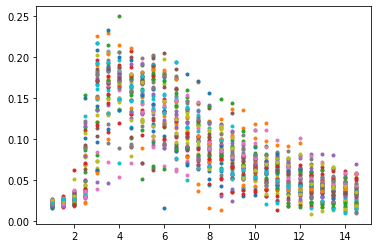

In [135]:
stds = []
mean_rs = []
for df in df_set.values():
    # plt.errorbar(Ks,df.r_mean,df.r_std,fmt='d')
    stds.append(df.r_std.to_list())
    mean_rs.append(df.r_mean.to_list())
    plt.plot(Ks,df.r_std,'.')

In [136]:
df_s =[df for df in df_set.values()]
df_s = pd.concat(df_s,keys=seeds)

In [137]:
df = df_s.reset_index()
df.to_csv(f'review/m={m},t={t_end},dK={dK}.csv',index=False)

In [98]:
df.xs(0).rs[2.5]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [138]:
stds = np.array(stds)
mean_rs = np.array(mean_rs)

In [139]:
max_ = np.max(stds,axis=0)
min_ = np.min(stds,axis=0)
mean_std = np.mean(stds,axis=0)
std_std = np.std(stds,axis=0)

In [140]:
Ks[np.argmax(stds,axis=1)]

array([4. , 3.5, 3. , 3. , 3.5, 3.5, 3.5, 3. , 6. , 3.5, 5. , 5.5, 4. ,
       3. , 3. , 3.5, 4. , 5.5, 6.5, 5.5, 3.5, 3. , 3.5, 4.5, 4. , 4. ,
       4. , 6. , 4. , 3.5, 3.5, 5.5, 5. , 4. , 4. , 6. , 5. , 4. , 3.5,
       3. , 5. , 4. , 4. , 6. , 4.5, 4.5, 7. , 3. , 4.5, 3. ])

In [141]:
Ks[np.argmax(stds,axis=1)]


array([4. , 3.5, 3. , 3. , 3.5, 3.5, 3.5, 3. , 6. , 3.5, 5. , 5.5, 4. ,
       3. , 3. , 3.5, 4. , 5.5, 6.5, 5.5, 3.5, 3. , 3.5, 4.5, 4. , 4. ,
       4. , 6. , 4. , 3.5, 3.5, 5.5, 5. , 4. , 4. , 6. , 5. , 4. , 3.5,
       3. , 5. , 4. , 4. , 6. , 4.5, 4.5, 7. , 3. , 4.5, 3. ])

<ErrorbarContainer object of 3 artists>

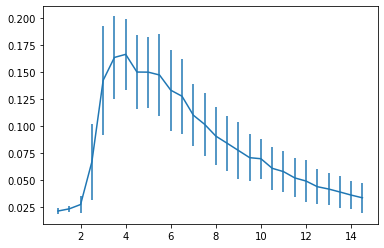

In [142]:
plt.errorbar(Ks,mean_std,std_std)

<ErrorbarContainer object of 3 artists>

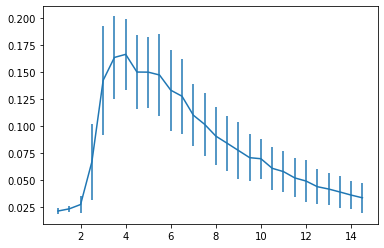

In [143]:
plt.errorbar(Ks,mean_std,std_std)


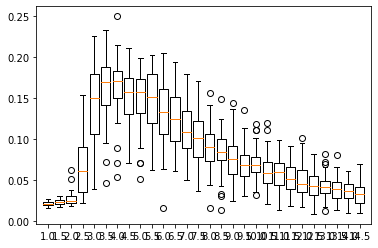

In [144]:
ln = plt.boxplot(stds,positions=Ks,labels=Ks,widths=dK*0.8)
# plt.xticks(Ks,Ks);

In [127]:
Draw_ = DD(m)

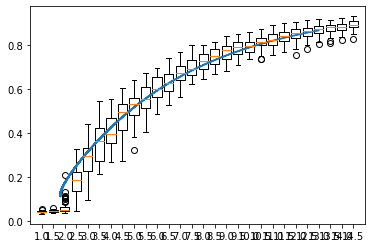

In [128]:
plt.boxplot(mean_rs,positions=Ks,labels=Ks,widths=dK*0.8);
ax =plt.gca()
Draw_.foward()

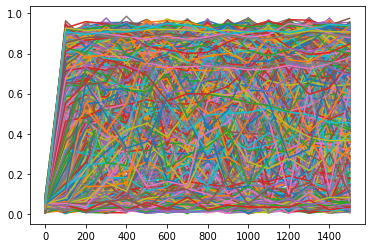

In [129]:
for rs in df.rs:
    plt.plot(t[::1000],rs[::1000])

In [124]:
df['r_mean'] = df.rs.apply(mean_r)
df['r_std'] = df.rs.apply(std_r)    

<ErrorbarContainer object of 3 artists>

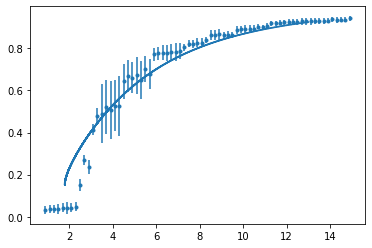

In [14]:
Draw_.foward()
plt.errorbar(Ks,df.r_mean,df.r_std,fmt='.')


<ErrorbarContainer object of 3 artists>

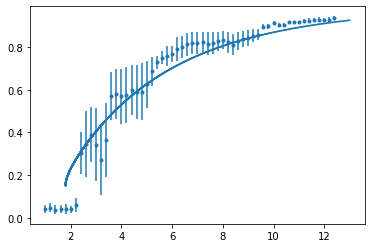

In [119]:
Draw_.foward()
plt.errorbar(Ks,df.r_mean,df.r_std,fmt='.')


<ErrorbarContainer object of 3 artists>

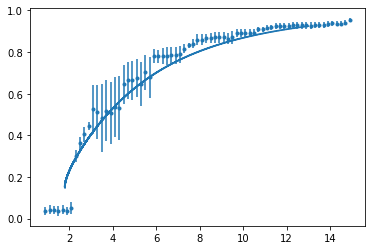

In [22]:
Draw_.foward()
plt.errorbar(Ks,df.r_mean,df.r_std,fmt='.')
